# Creación de Épocas con MNE-python (TOL)
## Creación de épocas

En esta cuarta parte se dividirá al registro en épocas. Es decir en los intérvalos de tiempo que nos interesa analizar.

## 0. Cargar paquetes

El paso cero es la carga de los paquetes. Es decir, la carga de las distintas funciones que vamos a estar utilizando en el script.

In [156]:
import mne
import numpy as np

## 1. Carga de datos

Posteriormente, cargamos los datos en formato .fif que ya se encuentran **referenciados**, **filtrados**, **limpios** y que han pasado por el proceso del **ICA**.

Primero, colocamos el código del sujeto dentro de un objeto llamado *subject_id*. De esta forma, nos ahorramos tener cambiar el código del sujeto en todo el código <br>
Luego, colocamos el código de la tarea dentro de un objeto llamado *task*.<br>
Finalmente, dentro de la función  `mne.io.read()`vamos a escribir la ruta al archivo dentro de la computadora. Cargaremos estos datos en un objeto llamado **raw**

In [157]:
subject_id = "SAAV0010"
task = "TOL"

raw = mne.io.read_raw_fif(("../data/" + task + "/" + "preprocessing/" + subject_id + "_" + task +"_REF_FILT_ANNOT_ICA.fif"), preload=True)

C:\Users\slipina\AppData\Local\Temp\ipykernel_16336\3935826253.py:4: RuntimeWarning: This filename (../data/TOL/preprocessing/SAAV0010_TOL_REF_FILT_ANNOT_ICA.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(("../data/" + task + "/" + "preprocessing/" + subject_id + "_" + task +"_REF_FILT_ANNOT_ICA.fif"), preload=True)


MemoryError: Unable to allocate 298. MiB for an array with shape (73, 535552) and data type float64

# 3. Colocar marcas

Al archivo con la señal neural vamos a agregarle las marcas de los estímulos. Es decir, vamos a marcar en que momento sucede cada uno de los estímulos de interés. En los datos de Resting este paso no es relevante.

Con `find_events()` vamos a almacenar las marcas dentro de un objeto llamado *events*. Con `print()` vamos a ver los primeros 5 eventos para asegurarnos de que aparezcan.

In [ ]:
events = mne.find_events(raw)
print(events[:5])  # show the first 5

[[49955     0     2]
 [51139     0     3]
 [52319     0     2]
 [53368     0     3]
 [54190     0     2]]


Ahora creamos un objeto llamado *mapping* que contiene el nombre de cada marca. Con `annotations_from_events()`le ponemos ese nombre a cada marca.

In [ ]:
mapping = {
    1: "Start",
    2: "Pick",
    3: "Release"
}
annot_from_events = mne.annotations_from_events(
    events=events,
    event_desc=mapping,
    sfreq=raw.info["sfreq"],
    orig_time=raw.info["meas_date"],
)
raw.set_annotations(annot_from_events)

<Raw | SAAV0010_TOL_REF_FILT_ANNOT_ICA.fif, 73 x 535552 (523.0 s), ~298.4 MB, data loaded>

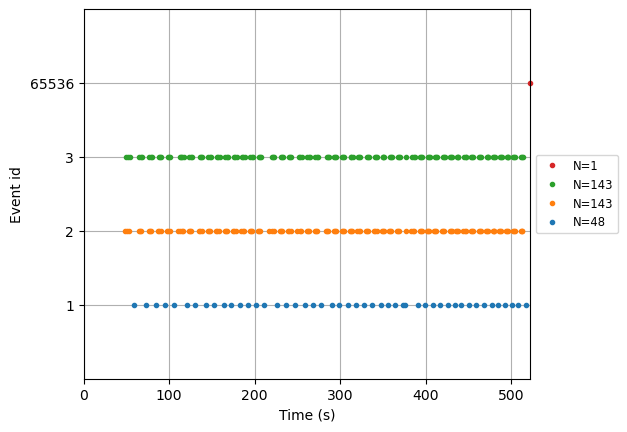

In [ ]:
fig = mne.viz.plot_events(
    events, sfreq=raw.info["sfreq"], first_samp=raw.first_samp
)

En la tarea de TOL, la marca de "start" se activa siempre 3 segundos después de que se apretó el botón de ok. Por lo tanto, tiene una marca más al final. Vamos a eliminarla para no confundirnos al momento de armar las épocas.

Primer vamos a almacenar todas las marcas de "start" en un mismo objeto llamado start_event.



In [ ]:
start_event = mne.pick_events(events, include=1)
start_event = start_event[:-1, :]
len(start_event)



47

In [ ]:
goal_hierarchy = ["12", "12", "12", "12", "12",
                  "13", "12", "12", "12", "12",
                  "12", "12", "12", "12", "12",
                  "13", "12", "12", "13", "12",
                  "12", "13", "12", "12", "12",
                  "12", "12", "13", "13", "13",
                  "12", "13", "13", "12", "13",
                  "12", "12", "12", "12", "12",
                  "12", "13", "12", "12", "12",
                  "13", "12", "12"]

In [ ]:
start_event[:,2] = goal_hierarchy[1:]

In [ ]:
mapping = {
    12: "Start/Tower",
    13: "Start/Plane",
}
annot_from_events = mne.annotations_from_events(
    events=start_event,
    event_desc=mapping,
    sfreq=raw.info["sfreq"],
    orig_time=raw.info["meas_date"],
)
raw.set_annotations(annot_from_events)

<Raw | SAAV0010_TOL_REF_FILT_ANNOT_ICA.fif, 73 x 535552 (523.0 s), ~298.4 MB, data loaded>

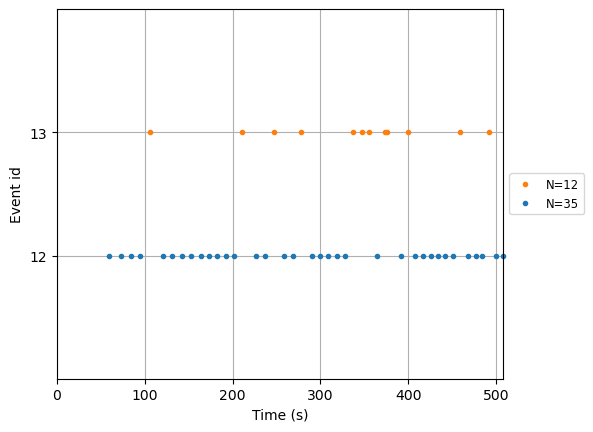

In [ ]:
fig = mne.viz.plot_events(
    start_event, sfreq=raw.info["sfreq"], first_samp=raw.first_samp
)

In [ ]:


# Check the result
print(start_event)

[[ 60119      0     12]
 [ 74868      0     12]
 [ 86207      0     12]
 [ 97100      0     12]
 [108003      0     13]
 [124020      0     12]
 [133729      0     12]
 [146210      0     12]
 [156403      0     12]
 [167507      0     12]
 [176733      0     12]
 [187118      0     12]
 [197037      0     12]
 [206436      0     12]
 [216274      0     13]
 [232112      0     12]
 [242507      0     12]
 [252789      0     13]
 [264977      0     12]
 [274747      0     12]
 [284716      0     13]
 [297796      0     12]
 [306111      0     12]
 [316112      0     12]
 [326215      0     12]
 [335995      0     12]
 [345156      0     13]
 [355534      0     13]
 [363964      0     13]
 [372902      0     12]
 [382233      0     13]
 [385318      0     13]
 [400621      0     12]
 [409327      0     13]
 [418056      0     12]
 [426770      0     12]
 [436004      0     12]
 [444743      0     12]
 [452237      0     12]
 [461786      0     12]
 [469988      0     13]
 [479472      0 

# 4. Crear épocas

Vamos a crear las épocas que nos interesan para TOL. Esto lo haremos a partir de la marca start_event.

In [153]:
reject_criteria = dict(
    eeg=100e-6,  # 100 µV

)  # 200 µV

flat_criteria = dict(eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

event_dict = {
    "Start/Tower": 12, 
    "Start/Plane" : 13
}

epochs = mne.Epochs(
    raw,
    start_event,
    tmin=-0.5,
    tmax=3,
    reject_tmax=0,
    baseline = (-0.5,0),
    reject=reject_criteria,
    flat=flat_criteria,
    reject_by_annotation=True,
    preload=True,
    event_id = mapping
)
epochs.plot_drop_log()

TypeError: Event names must be an instance of str, got <class 'int'> instead.

c:\Users\slipina\AppData\Local\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


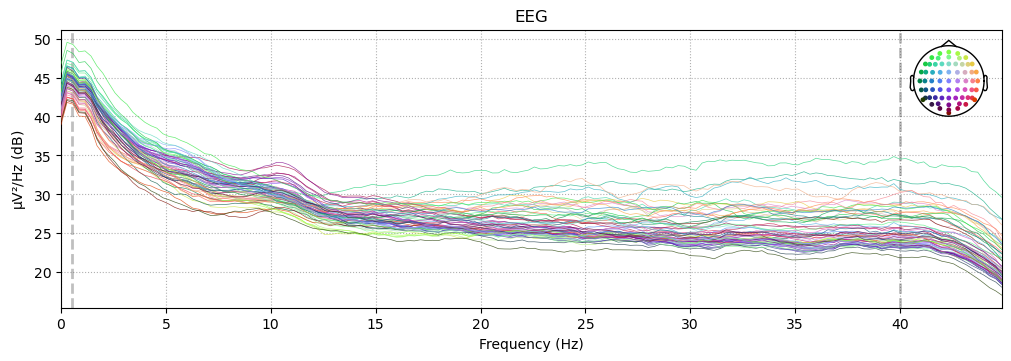

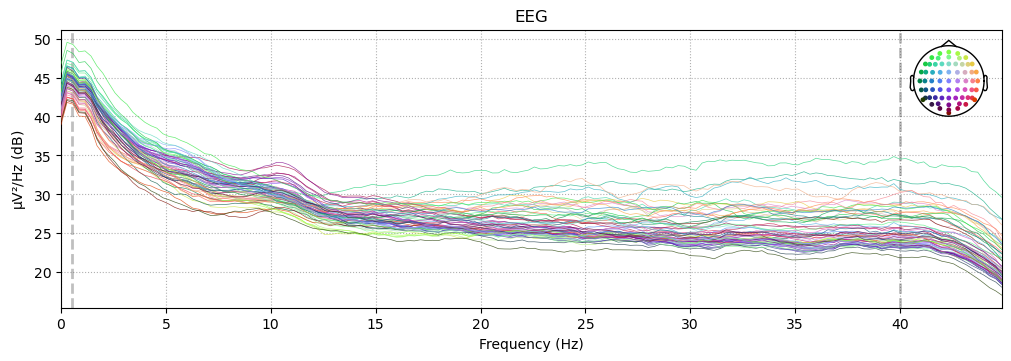

In [ ]:
epochs.compute_psd(fmax=45).plot(picks="eeg", exclude="bads")

C:\Users\slipina\AppData\Local\Temp\ipykernel_16336\2804463677.py:1: RuntimeWarning: Only one channel in group "Fpz"; cannot combine by method "mean".
  epochs.plot_image(picks="Fpz", combine = "mean")
C:\Users\slipina\AppData\Local\Temp\ipykernel_16336\2804463677.py:1: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  epochs.plot_image(picks="Fpz", combine = "mean")


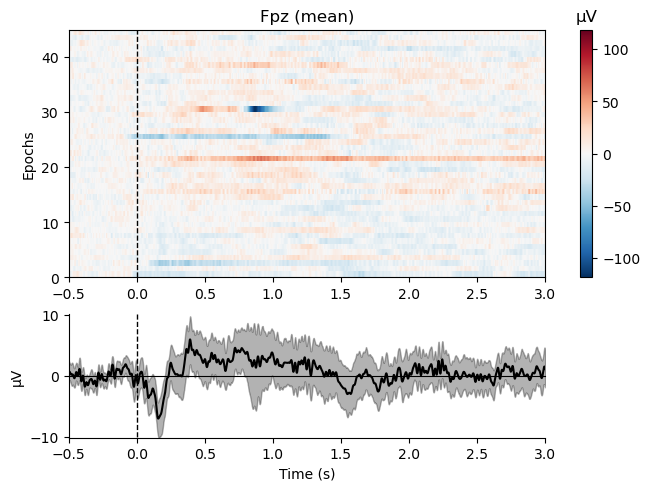

[<Figure size 640x480 with 3 Axes>]

In [ ]:
epochs.plot_image(picks="Fpz", combine = "mean")

## 5. Guardar datos epoqueados

In [ ]:
epochs.save(("../data/" + task + "/epochs/" + subject_id + "_" + task +"_epochs_05_3.fif"), overwrite=True)

C:\Users\slipina\AppData\Local\Temp\ipykernel_16336\3012428882.py:1: RuntimeWarning: This filename (../data/TOL/epochs/SAAV0010_TOL_epochs_05_3.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(("../data/" + task + "/epochs/" + subject_id + "_" + task +"_epochs_05_3.fif"), overwrite=True)
